In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from log_progress import log_progress

a = np.load('I_data.npz')
ab = np.load('I_data_noisy.npz')
d = dict(zip(("Idata{}".format(k) for k in a), (a[k] for k in a)))
db = dict(zip(("Idatanoisy{}".format(k) for k in ab), (ab[k] for k in ab)))

In [2]:
print(d.keys())
print(db.keys())

dict_keys(['Idataf_axis', 'IdataImat', 'Idatat_axis'])
dict_keys(['Idatanoisyf_axis', 'IdatanoisyImat', 'Idatanoisyt_axis'])


In [3]:
f_array1 = d['Idataf_axis']
t_array1 = d['Idatat_axis']
imat1 = d['IdataImat']

In [4]:
f_array2 = db['Idatanoisyf_axis']
t_array2 = db['Idatanoisyt_axis']
imat2 = db['IdatanoisyImat']

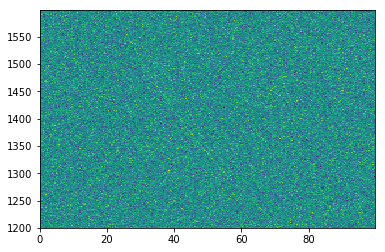

In [9]:
plt.imshow(imat2.transpose(), origin='lower', extent=(np.min(t_array1),
        np.max(t_array1), np.min(f_array1), np.max(f_array1)), aspect='auto')

In [27]:
def A_Output(delta_t, t0, I, f, t):
    if delta_t<0:
        return(0)
    d = delta_t/((1/(f.min()**2))-(1/(f.max()**2)))
    m = (t.max()-t.min())/(len(t)-1)
    
    a_array = []
    #this array saves all amplitudes for the last summation step

    for i in range (len(f)):
        Amp = I[round(((t0-d*(1/(f.min()**2)-1/(f[i]**2)))-t[0])/m),i]
        a_array.append(Amp)
    Sum = np.sum(a_array)
    return(Sum)

def max_finder(dispersionlist, t):
    i,j = np.unravel_index(np.argmax(dispersionlist), dispersionlist.shape)
    print('t0 is found at', t[i], 'and delta t is', t[j], 'both results in respective time units')

def dispersion_measure(I, f, t):
    dispersionlist = np.zeros_like(I)
    for i in log_progress(range(len(t))):
        for j in range(i):
            t0 = t[i]
            delta_t = t[j]
            dispersionlist[[i],[j]] = A_Output(delta_t, t0, I, f, t)
    plt.imshow(dispersionlist.transpose(), origin='lower', extent=(np.min(t),
        np.max(t), np.min(t), np.max(t)), aspect='auto')
    max_finder(dispersionlist, t)
    return(dispersionlist)

/home/edgar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


t0 is found at 72.265625 and delta t is 50.390625 both results in respective time units


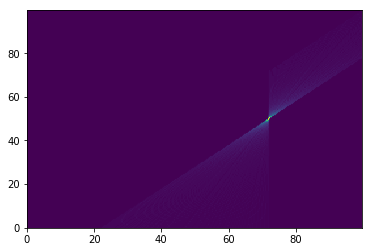

In [28]:
r = dispersion_measure(imat1, f_array1, t_array1)

/home/edgar/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


t0 is found at 72.265625 and delta t is 50.390625 both results in respective time units


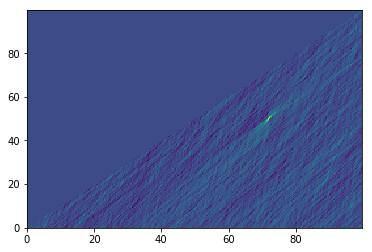

In [29]:
rb = dispersion_measure(imat2, f_array2, t_array2)

Could there ever possibly be an event in which the dispersion isn't actually over a long-ish period? If so, depending on the t0, could it mean that we may be missing possible FRB recordings? 

How does data recording and processing work; in the data you gave me, we have some arbitrary time set to 0 with a delta t of 10ms up to 1000ms... In real data processing, do physicists only ever just take a certain extension of their data and process it, or is there a way to allow incoming data to be processed continously?

Once a radio telescope is functioning, does it itself take a while to process and record data? And what does this data usually look like? Does it take up a lot of computer storage space?

In [32]:
def max_finder(dispersionlist, t):
    i,j = np.unravel_index(np.argmax(dispersionlist), dispersionlist.shape)
    print(t[i], t[j])

In [31]:
t_array1

array([  0.      ,   0.390625,   0.78125 ,   1.171875,   1.5625  ,
         1.953125,   2.34375 ,   2.734375,   3.125   ,   3.515625,
         3.90625 ,   4.296875,   4.6875  ,   5.078125,   5.46875 ,
         5.859375,   6.25    ,   6.640625,   7.03125 ,   7.421875,
         7.8125  ,   8.203125,   8.59375 ,   8.984375,   9.375   ,
         9.765625,  10.15625 ,  10.546875,  10.9375  ,  11.328125,
        11.71875 ,  12.109375,  12.5     ,  12.890625,  13.28125 ,
        13.671875,  14.0625  ,  14.453125,  14.84375 ,  15.234375,
        15.625   ,  16.015625,  16.40625 ,  16.796875,  17.1875  ,
        17.578125,  17.96875 ,  18.359375,  18.75    ,  19.140625,
        19.53125 ,  19.921875,  20.3125  ,  20.703125,  21.09375 ,
        21.484375,  21.875   ,  22.265625,  22.65625 ,  23.046875,
        23.4375  ,  23.828125,  24.21875 ,  24.609375,  25.      ,
        25.390625,  25.78125 ,  26.171875,  26.5625  ,  26.953125,
        27.34375 ,  27.734375,  28.125   ,  28.515625,  28.906

In [34]:
max_finder(rb)

185 56


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 82.,  82.,  82.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  10.,  20.,  21.,  20.,  21.,  20.,  21.,
         20.,  21.,  20.,  21.,  20.,  21.]),
 array([    0.     ,    31.96875,    63.9375 ,    95.90625,   127.875  ,
          159.84375,   191.8125 ,   223.78125,   255.75   ,   287.71875,
          319.6875 ,   351.65625,   383.625  ,   415.59375,   447.5625 ,
          479.53125,   511.5    ,   543.46875,   575.4375 ,   607.40625,
          639.375  ,   671.34375,   703.3125 ,   735.28125,   767.25   ,
          799.21875,   831.1875 ,   863.15625,   895.125  ,   927.09375,
          959.0625 ,   991.03125,  1023.     ,  1054.96875,  1086.9375 ,
         1118.90625,  1150.875  ,  1182.84375,  1214.8125 ,  1246.78125,
         1278.75   ,  1310.71875,  1342.6875 ,  1374.65625,  1406.625  ,
 

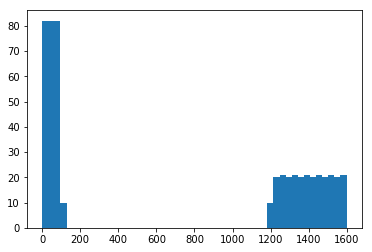

In [33]:
plt.hist(np.hstack((t_array, f_array)), bins=50)

(array([ 26.,  25.,  26.,  25.,  26.,  25.,  26.,  25.,  26.,  26.]),
 array([ 1200.     ,  1239.84375,  1279.6875 ,  1319.53125,  1359.375  ,
         1399.21875,  1439.0625 ,  1478.90625,  1518.75   ,  1558.59375,
         1598.4375 ]),
 <a list of 10 Patch objects>)

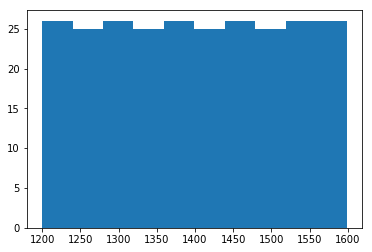

In [19]:
plt.hist(f_array)

In [14]:
np.any(~(im == 0))

True

d is type: <class 'dict'>
dict_keys(['Idataf_axis', 'IdataImat', 'Idatat_axis'])
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(256, 256) 256 256


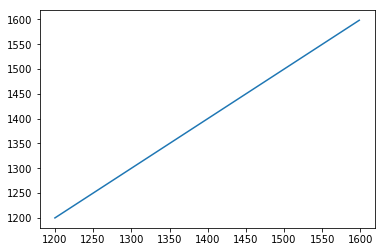

In [1]:
print(im)
print(im.shape, len(f_array), len(t_array))

plt.plot(t_array,f_array)
plt.show()

In [ ]:
def cool(I,)